In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import scipy.stats as stats
#Preprocessing
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , QuantileTransformer , PowerTransformer
#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
pip install LabelEncoder

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement LabelEncoder (from versions: none)
ERROR: No matching distribution found for LabelEncoder


In [5]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import scipy.stats as stats
#Preprocessing
from sklearn.preprocessing import LabelEncoder , MinMaxScaler , QuantileTransformer , PowerTransformer
#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:/Users/Guru Kiran/Downloads/Iris.csv')

In [5]:
df.drop(columns=['Id'],inplace=True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
num_train_rows, num_train_columns = df.shape
#Printing the number of rows and columns.
print("Iris Flower Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

Iris Flower Data:
Number of Rows: 150
Number of Columns: 5



In [8]:
df_null = df.isnull().sum().sum()

print(f'Null Count in Data: {df_null}')

Null Count in Data: 0


In [9]:
data_duplicates = df.duplicated().sum()

# Print the results
print(f"Number of duplicate rows in Data: {data_duplicates}")

Number of duplicate rows in Data: 3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
object_columns = df.select_dtypes(include=['object']).columns
print(f'The Following Columns Have Dtype as Object \n: {object_columns}')
print(f'The Value Count of Categorical Columns is : {object_columns.value_counts().sum()}')

The Following Columns Have Dtype as Object 
: Index(['Species'], dtype='object')
The Value Count of Categorical Columns is : 1


In [13]:
float_columns = df.select_dtypes(include=['float','int']).columns
print(f'The Following Columns Have Dtype as Float and int :\n{float_columns}')
print(f'The Value Count of Float Columns is : {float_columns.value_counts().sum()}')

The Following Columns Have Dtype as Float and int :
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
The Value Count of Float Columns is : 4


In [14]:
def print_feature_stats(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
    for feature in numeric_features:
        feature_data = df[feature]
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        feature_std = feature_data.std()
        feature_count = feature_data.count()
        
        print(f"Feature: {feature}")
        print(f"Mean: {feature_mean:.2f}")
        print(f"Median: {feature_median:.2f}")
        print(f"Standard Deviation: {feature_std:.2f}")
        print(f"Count: {feature_count}")
        print()
print_feature_stats(df)

Feature: SepalLengthCm
Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Count: 150

Feature: SepalWidthCm
Mean: 3.05
Median: 3.00
Standard Deviation: 0.43
Count: 150

Feature: PetalLengthCm
Mean: 3.76
Median: 4.35
Standard Deviation: 1.76
Count: 150

Feature: PetalWidthCm
Mean: 1.20
Median: 1.30
Standard Deviation: 0.76
Count: 150



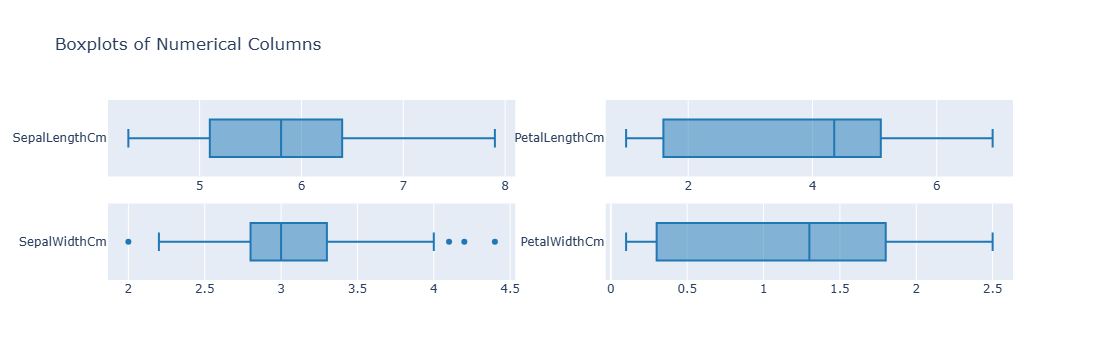

In [15]:
numerical_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
# Calculate the number of rows and columns needed for subplots
num_cols = 2
num_rows = (len(numerical_features) + num_cols - 1) // num_cols  # Calculate number of rows based on columns

# Create subplots with the calculated number of rows and columns
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop through numerical columns and add boxplots with color
for i, col in enumerate(numerical_features, start=1):
    row_num = (i - 1) % num_rows + 1
    col_num = (i - 1) // num_rows + 1
    fig.add_trace(
        go.Box(
            x=df[col],
            name=col,
            marker_color='#1f77b4',  # Set box color
            line_color='#1f77b4'     # Set mean line color
        ),
        row=row_num,
        col=col_num
    )

# Update layout
fig.update_layout(title_text="Boxplots of Numerical Columns", showlegend=False,)

# Show the plot
fig.show()


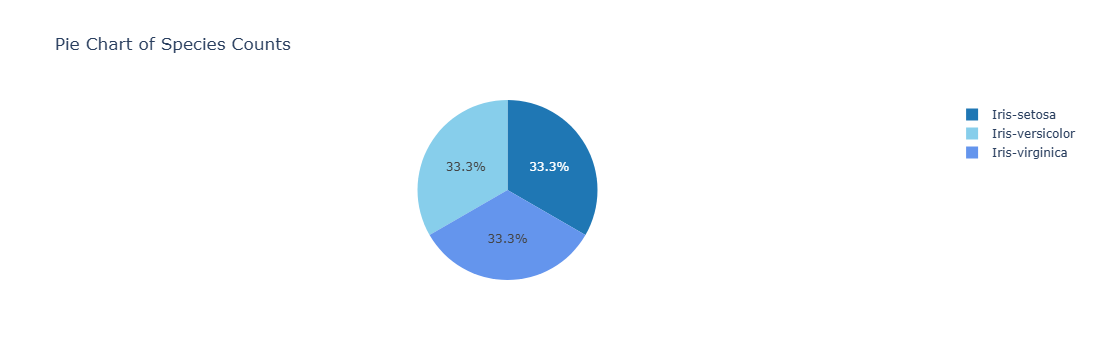

In [16]:
custom_colors = ['#1f77b4', 'skyblue', 'cornflowerblue']


# Create a pie chart with custom colors
fig_pie = px.pie(values=[50, 50, 50],
                 names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                 title='Pie Chart of Species Counts',
                 color_discrete_sequence=custom_colors)

# Show the pie chart
fig_pie.show()


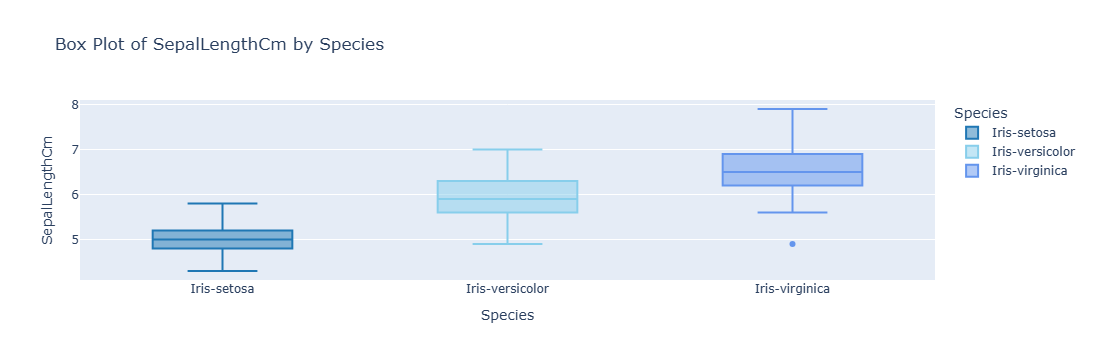

In [17]:
fig_boxplot = px.box(df, x="Species", y="SepalLengthCm", title="Box Plot of SepalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalLengthCm",)

# Show the box plot
fig_boxplot.show()

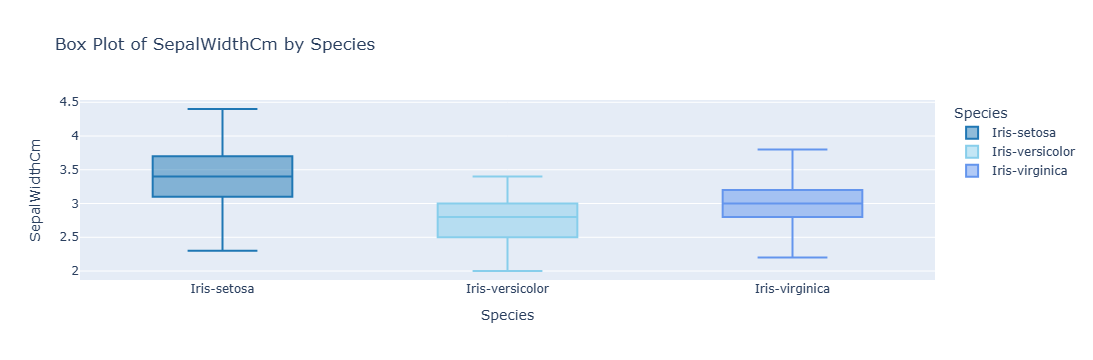

In [18]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="SepalWidthCm", title="Box Plot of SepalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="SepalWidthCm")

# Show the box plot
fig_boxplot.show()

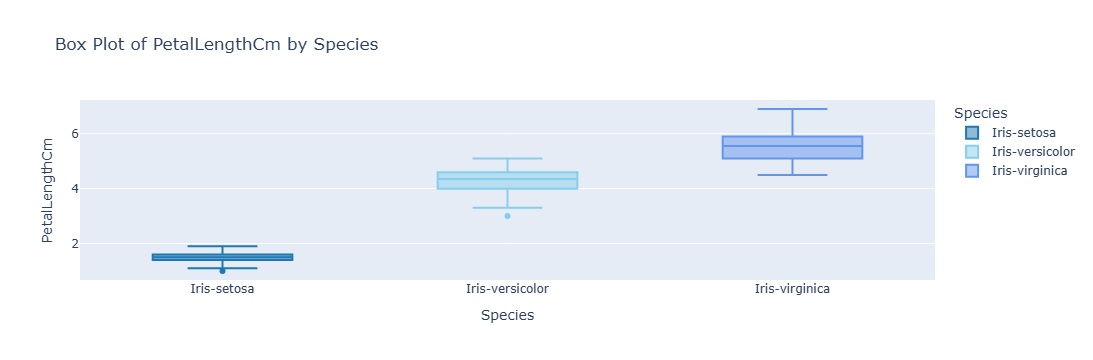

In [19]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalLengthCm", title="Box Plot of PetalLengthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalLengthCm",)

# Show the box plot
fig_boxplot.show()

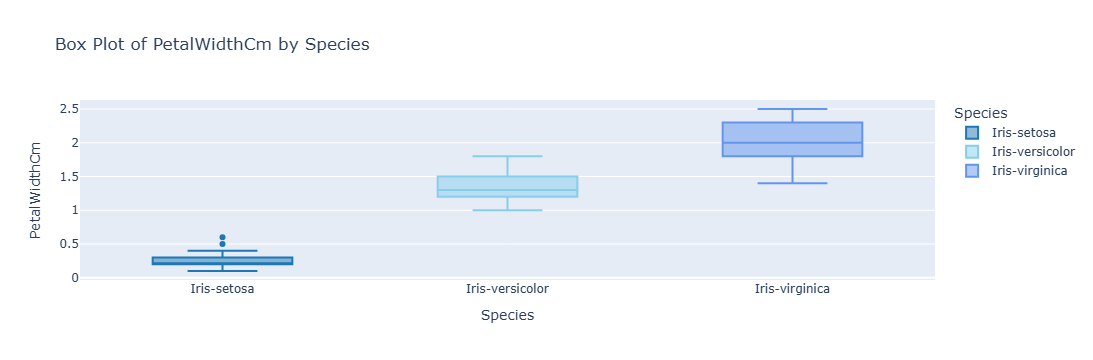

In [20]:
# Create a box plot to show the relationship between a numerical variable and a categorical variable
fig_boxplot = px.box(df, x="Species", y="PetalWidthCm", title="Box Plot of PetalWidthCm by Species",
                     color='Species',  # Set box color based on Species
                     color_discrete_sequence=custom_colors  # Custom color sequence
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="PetalWidthCm",)

# Show the box plot
fig_boxplot.show()

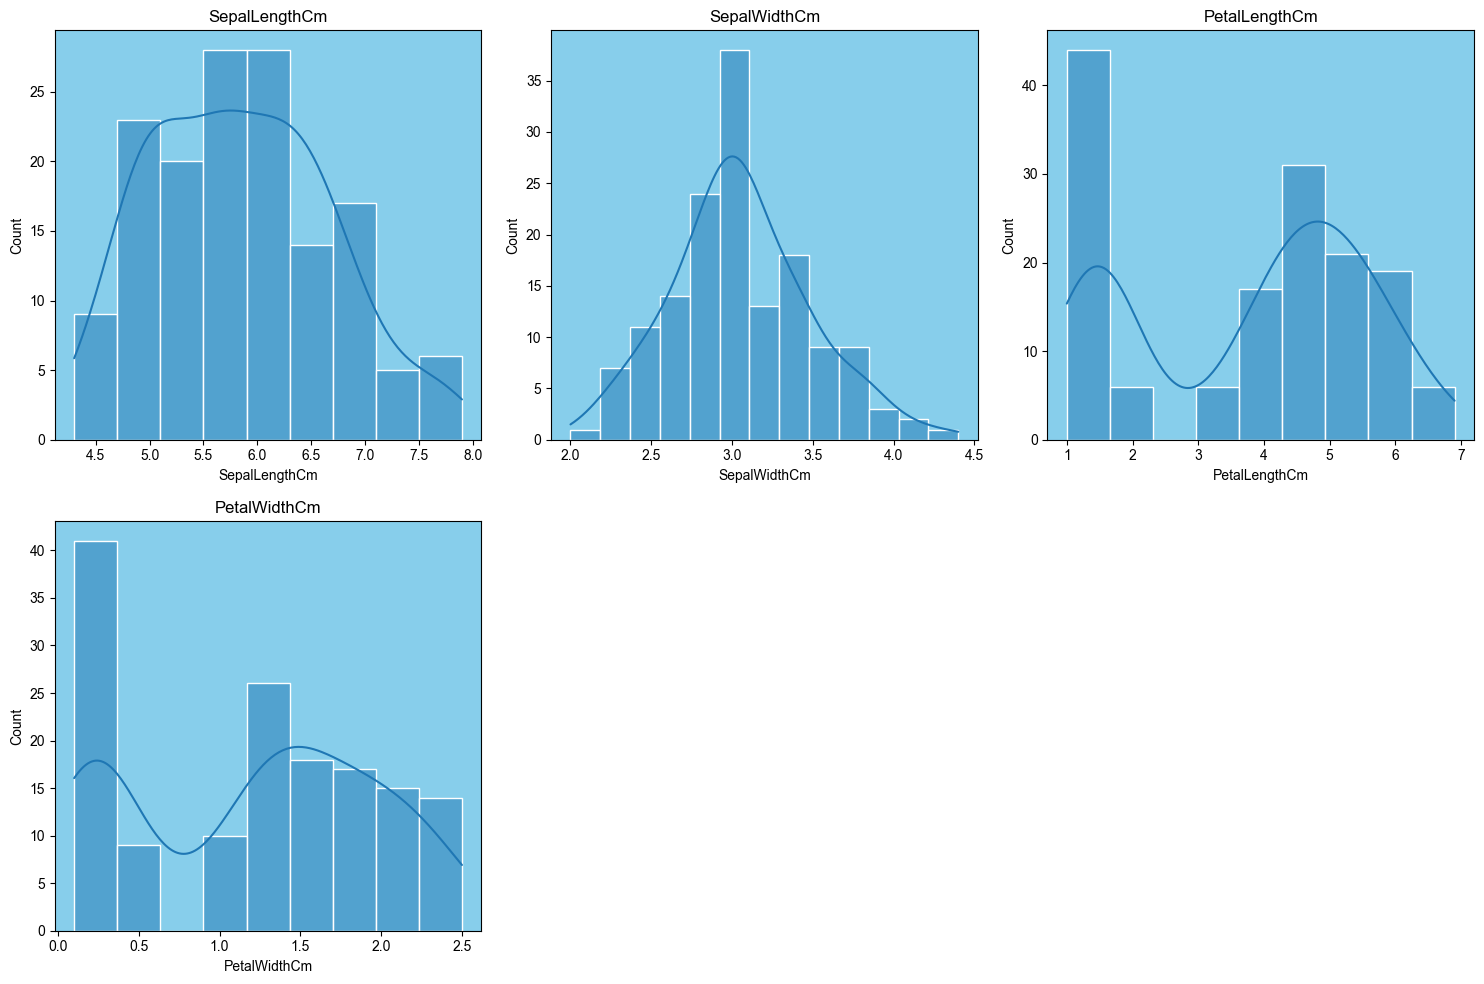

In [21]:
# Get numeric columns and layout info
numeric_features = df.select_dtypes(include=['number']).columns
num_features = len(numeric_features)
num_rows = (num_features + 2) // 3  # Adjust based on how many plots per row
num_cols = 3

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

sns.set_theme(style="darkgrid")

# Loop through each numerical feature and plot
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_facecolor('skyblue')

# Remove unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [22]:
def quantile_transform(data,cols):
    # Transformer 
    qt = QuantileTransformer(output_distribution='normal')
    #Use a Loop to Transformer
    for col in cols:
        data[col] = qt.fit_transform(data[[col]])
    return data
#Transform Data
df = quantile_transform(df,numeric_features) 

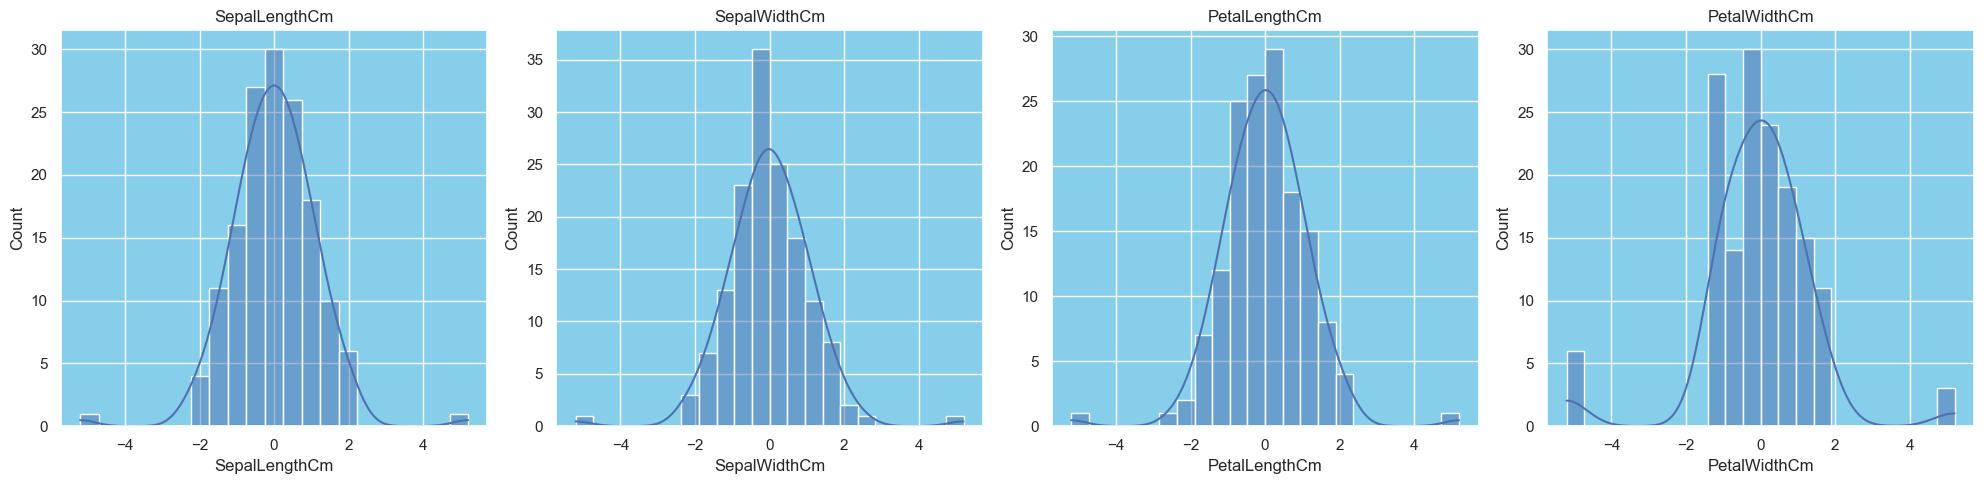

In [23]:
numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_rows = math.ceil(num_features / 4)  # Adjust the number 4 based on how many plots you want per row
num_cols = min(num_features, 4)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

sns.set_theme(style="darkgrid")

# Loop through each numerical feature and create a distribution plot with custom bar color
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_facecolor('skyblue')  # Set background color to skyblue
# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
def quantile_transform(data,cols):
    # Transformer 
    qt = QuantileTransformer(output_distribution='normal')
    #Use a Loop to Transformer
    for col in cols:
        data[col] = qt.fit_transform(data[[col]])
    return data
#Transform Data
df = quantile_transform(df,numeric_features) 

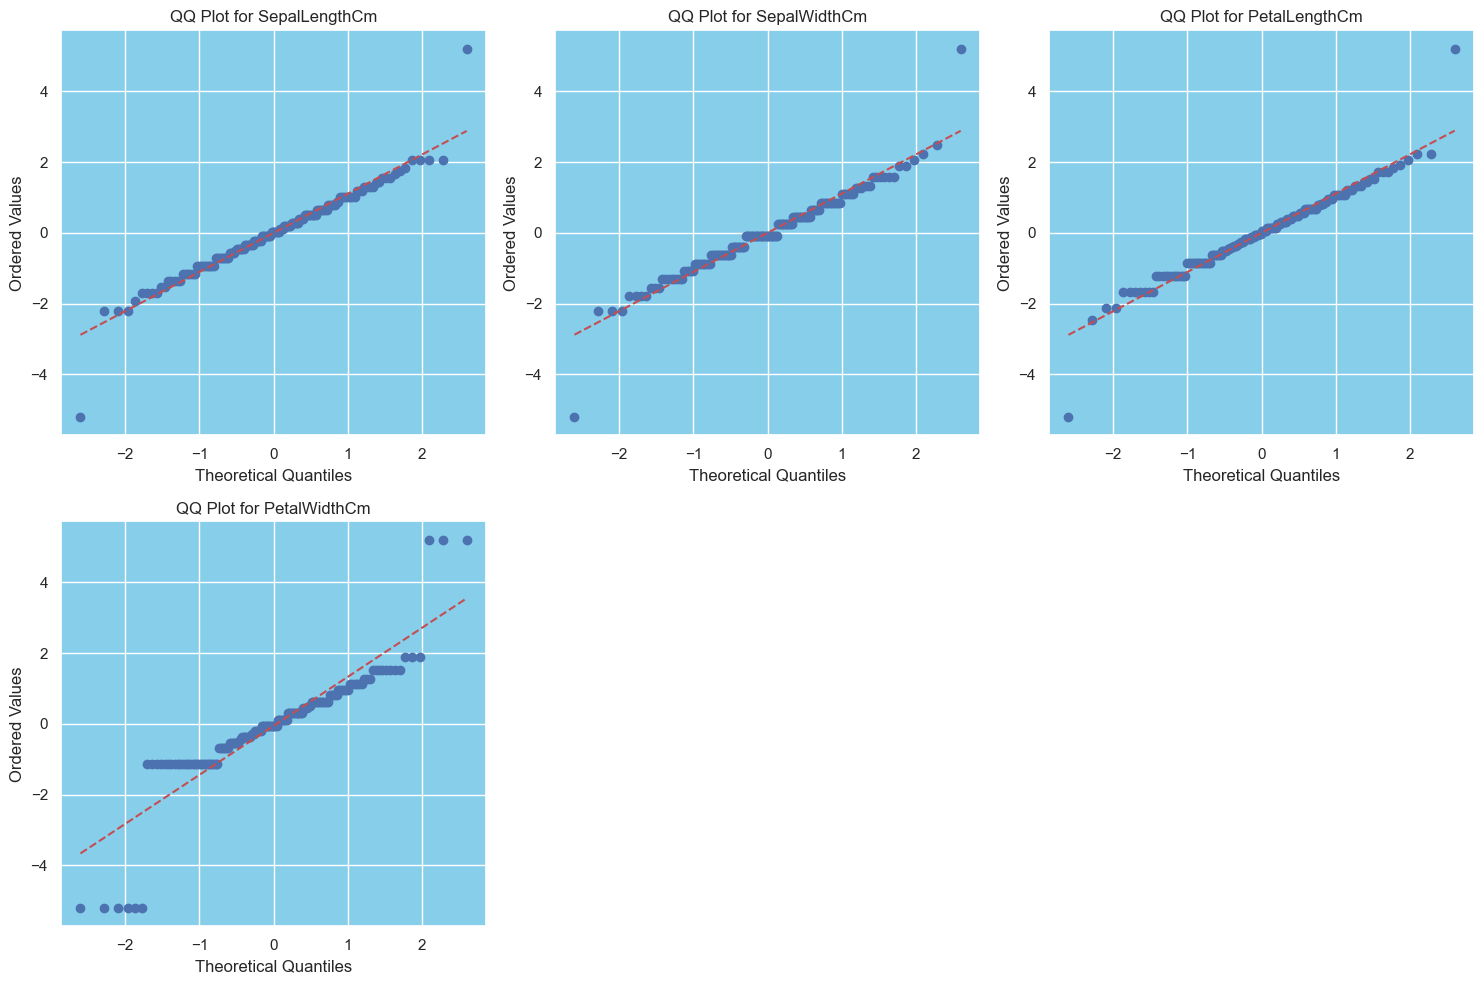

In [25]:
def plot_qq(df_qt, feature, ax):
    stats.probplot(df_qt[feature], dist="norm", plot=ax)
    ax.get_lines()[1].set_linestyle('--')
    ax.set_title(f"QQ Plot for {feature}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Ordered Values")

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_cols = 3  # Number of plots per row
num_rows = math.ceil(num_features / num_cols)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5*num_cols, 5*num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each numerical feature and create a QQ plot
for i, col in enumerate(numeric_features):
    plot_qq(df, col, axes[i])
    axes[i].set_facecolor('skyblue') 

# Remove any unused subplots
for i in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

In [27]:
def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


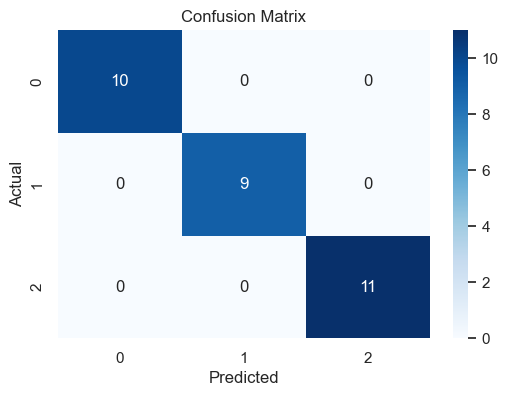

In [28]:
# Splitting the data into Features & Targets
X = df.drop(columns='Species', axis=1)
y = df['Species']

# Splitting the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = evaluate_results(y_test,y_pred_svm)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


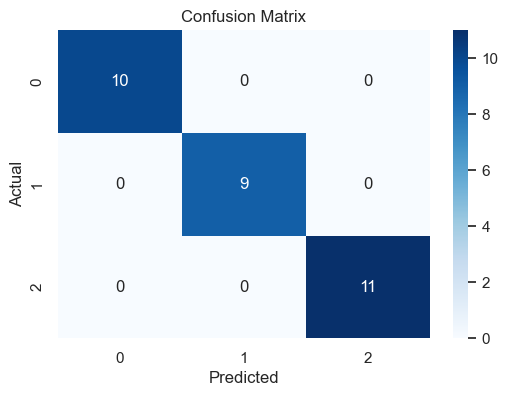

In [29]:
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

#Evaluate 
accuracy_knn = evaluate_results(y_test, y_pred_knn)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


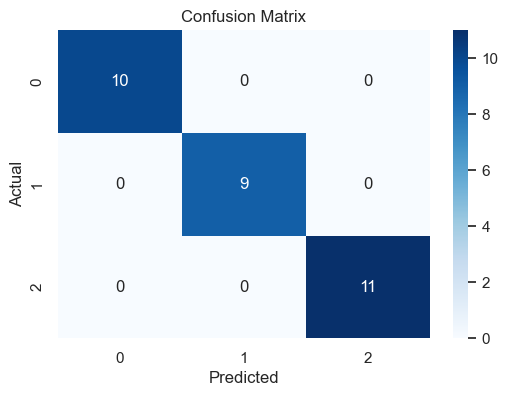

In [30]:
# Split the data into features (X) and target (y)
X = df.drop(columns='Species')
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = evaluate_results(y_test, y_pred_dt)

In [31]:
print('1. We have trained three models to evaluate their performance:')
print(f'- The SVM model achieved an accuracy of {accuracy_svm[0]:.2f}.')
print(f'- The KNN model achieved an accuracy of {accuracy_knn[0]:.2f}.')
print(f'- The Decision Tree model achieved an accuracy of {accuracy_dt[0]:.2f}.')
print(f'As we Know All The Models are Performing Well and giving Accuracy of 100%')

1. We have trained three models to evaluate their performance:
- The SVM model achieved an accuracy of 1.00.
- The KNN model achieved an accuracy of 1.00.
- The Decision Tree model achieved an accuracy of 1.00.
As we Know All The Models are Performing Well and giving Accuracy of 100%


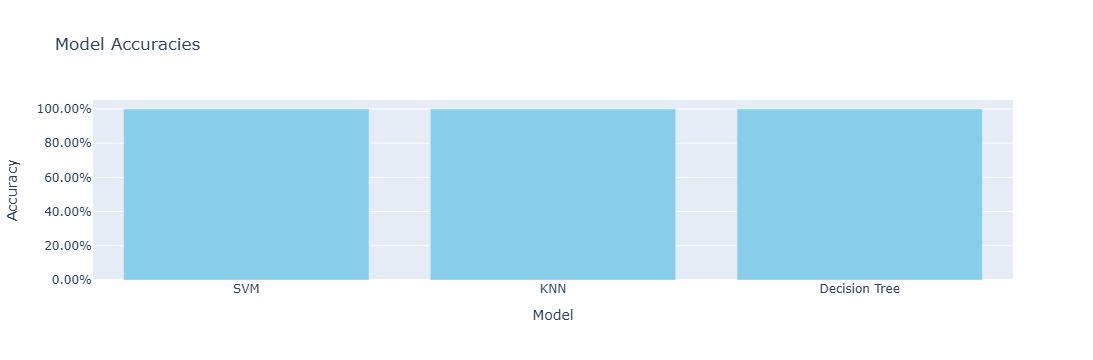

In [32]:
# Define model names and accuracies
model_names = ['SVM', 'KNN', 'Decision Tree']
accuracies = [accuracy_svm[0], accuracy_knn[0], accuracy_dt[0]]

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=model_names, y=accuracies, marker_color='skyblue')])
fig.update_layout(
                  title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis=dict(tickformat=".2%"))
fig.show()

In [1]:
a=df.groupby(['SepalWidthCm','SepalLengthCm']).size().unstack()

NameError: name 'df' is not defined